In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [2]:
data = pd.read_csv("instagram_reach.csv")

In [3]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [13]:
## Lets plot the word cloud caption and hashtag
def wordcloud(data,column):
    texCld = ''
    cld = data[column]
    for i in cld:
        texCld = texCld + str(i)
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = STOPWORDS,  min_font_size = 10).generate(texCld)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(column))
    plt.tight_layout(pad = 0) 
  
    plt.show()
    

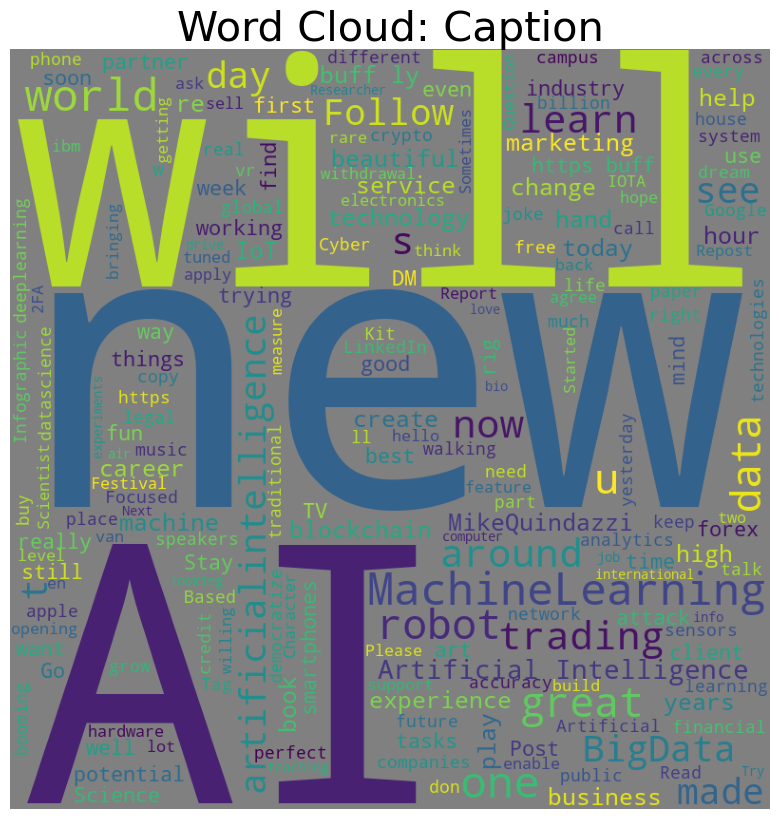

In [14]:
wordcloud(data,'Caption')

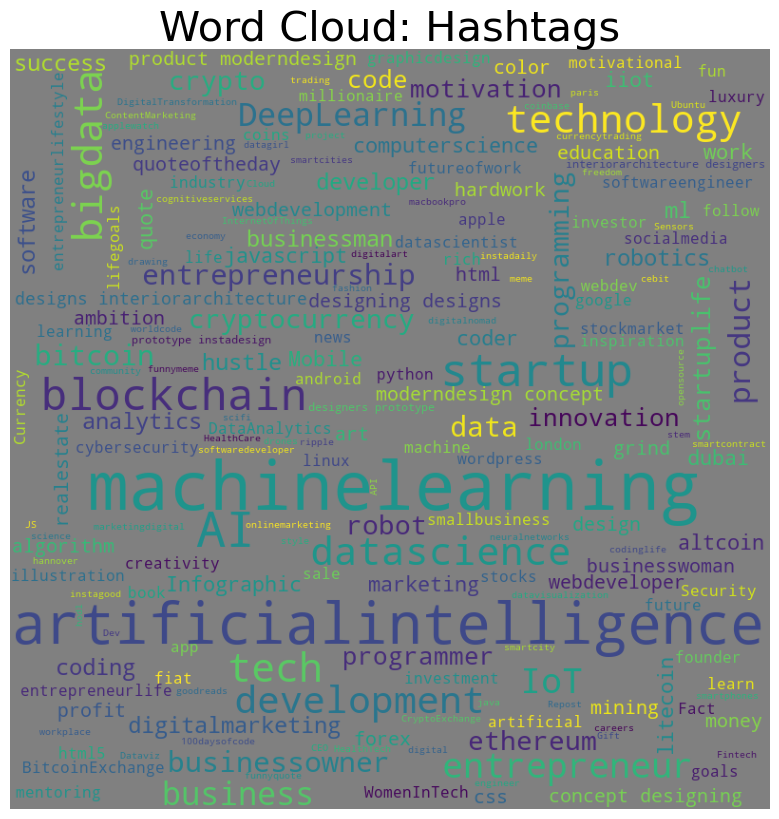

In [15]:
wordcloud(data,'Hashtags')

In [16]:
data['Time since posted'].head()

0    11 hours
1     2 hours
2     2 hours
3     3 hours
4     3 hours
Name: Time since posted, dtype: object

In [17]:
## Remove hours
data['Time since posted'] = data['Time since posted'].apply(lambda x: int(x.split()[0]))

In [18]:
data['Time since posted'].head()

0    11
1     2
2     2
3     3
4     3
Name: Time since posted, dtype: int64

<Axes: xlabel='Time since posted', ylabel='Followers'>

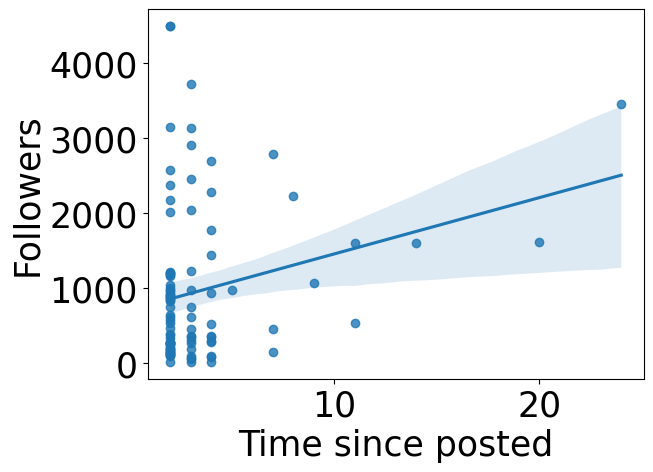

In [20]:
sns.regplot(data,x='Time since posted',y='Followers')

<Axes: xlabel='Likes', ylabel='Followers'>

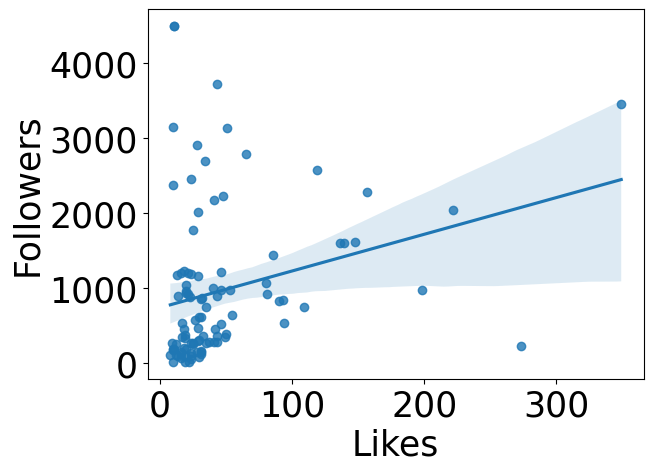

In [21]:
sns.regplot(data,x='Likes',y='Followers')

<Axes: xlabel='Likes', ylabel='Time since posted'>

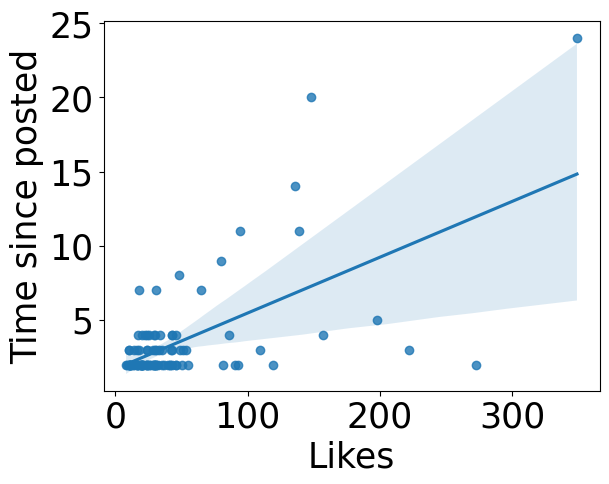

In [22]:
sns.regplot(data,x='Likes',y='Time since posted')

In [23]:
# Remove unnecessary columns
data= data.drop(['Unnamed: 0', 'S.No'], axis=1)

In [28]:
len(data['USERNAME'].unique())

95

In [29]:
data = data.drop('USERNAME',axis=1)

In [30]:
data.head()

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [32]:
## lets plot somemore relation
data['Caption'] = data['Caption'].fillna("")
caption_count = data['Caption'].apply(lambda x: len(x.split()))

In [34]:
hash_count = data['Hashtags'].apply(lambda x: len(x.split()))

<Axes: xlabel='Likes', ylabel='Caption'>

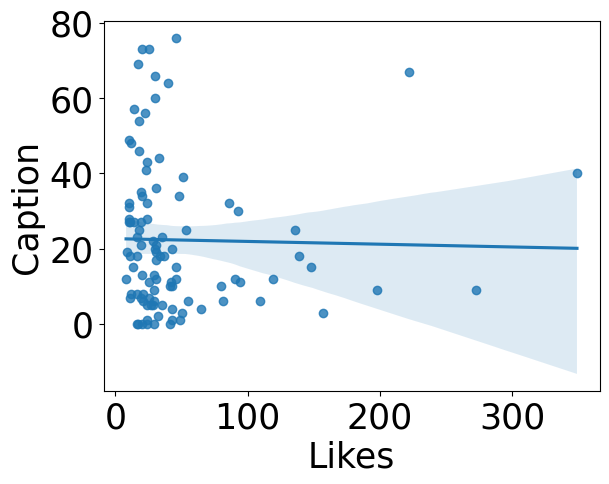

In [37]:
sns.regplot(data,x='Likes',y=caption_count)

<Axes: xlabel='Likes', ylabel='Hashtags'>

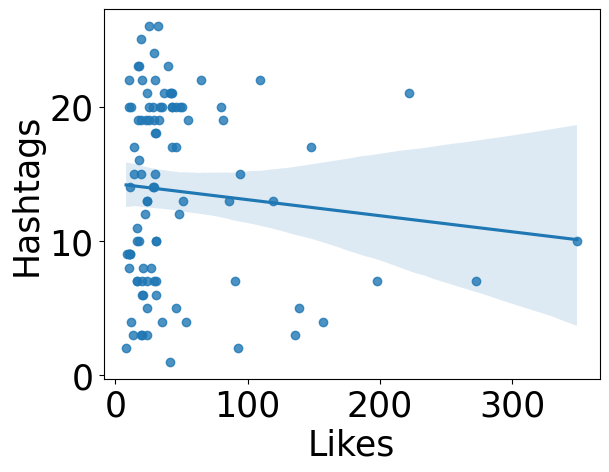

In [38]:
sns.regplot(data,x='Likes',y=hash_count)